# Exibindo as posição de um time ao longo do tempo em um campeonato

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccer import Championship
# Championship é uma classe, criada por mim, usada aqui para representar o campeonato,
# com ela podemos representar sua tabela e obter as posições de um time ao longo do tempo visualizar

In [2]:
# matches é um dataset de todos os jogos do campeonato brasileiro de 2019, é o que usamos para "alimentar" a classe
matches = pd.read_csv('data/camp_brasileiro/camp_brasileiro_2019.csv')
matches['date'] = pd.to_datetime(matches['date'], format='%Y-%m-%d %H:%M')
matches.head()

,date,gameweek,home,home_score,away_score,away
0,2019-04-27 16:00:00,1,São Paulo,2,0,Botafogo (RJ)
1,2019-04-27 19:00:00,1,Chapecoense,2,0,Internacional
2,2019-04-27 19:00:00,1,Atlético Mineiro,2,1,Avaí
3,2019-04-27 21:00:00,1,Flamengo,3,1,Cruzeiro
4,2019-04-28 11:00:00,1,Grêmio,1,2,Santos


In [3]:
# Aqui criamos um campeonato já definindo quais times fazem parte dele
brasileirao = Championship(matches['home'].unique())
brasileirao

               Times  Pontos  Jogos  Vitórias  Empates  Derrotas  GP  GC  SG
1          São Paulo       0      0         0        0         0   0   0   0
2        Chapecoense       0      0         0        0         0   0   0   0
3   Atlético Mineiro       0      0         0        0         0   0   0   0
4           Flamengo       0      0         0        0         0   0   0   0
5             Grêmio       0      0         0        0         0   0   0   0
6              Ceará       0      0         0        0         0   0   0   0
7     Atl Paranaense       0      0         0        0         0   0   0   0
8              Bahia       0      0         0        0         0   0   0   0
9          Palmeiras       0      0         0        0         0   0   0   0
10        Fluminense       0      0         0        0         0   0   0   0
11     Internacional       0      0         0        0         0   0   0   0
12       Corinthians       0      0         0        0         0   0   0   0

In [4]:
# Para adicionar os jogos ao campeonato é simples, visto que a classe já foi definida para aceitar o dataset naquele formato
# (esta parte de adicionar os jogos leva alguns bons segundos)
brasileirao.add_matches(matches)
brasileirao

               Times  Pontos  Jogos  Vitórias  Empates  Derrotas  GP  GC  SG
1           Flamengo      90     38        28        6         4  86  37  49
2             Santos      74     38        22        8         8  60  33  27
3          Palmeiras      74     38        21       11         6  61  32  29
4             Grêmio      65     38        19        8        11  64  39  25
5     Atl Paranaense      64     38        18       10        10  51  32  19
6          São Paulo      63     38        17       12         9  39  30   9
7      Internacional      57     38        16        9        13  44  39   5
8        Corinthians      56     38        14       14        10  42  34   8
9          Fortaleza      53     38        15        8        15  50  49   1
10             Goiás      52     38        15        7        16  46  64 -18
11             Bahia      49     38        12       13        13  44  43   1
12     Vasco da Gama      49     38        12       13        13  39  45  -6

In [5]:
# Aqui criamos uma função para o objetivo principal, usamos o método da classe para obter as posições de um determinado
# time ou lista de times e plotamos isso usando o matplotlib
def plot_positions_over_time(championship, teams):
    def add_to_plot(championship, team):
        positions = championship.get_positions_over_time(team)
        date = [date[1] for date in positions]
        position = [position[0] for position in positions]
        plt.plot(date, position, '.-', label=team)
    
    plt.figure(figsize=(15, 7))
    if type(teams) == list:
        for team in teams:
            add_to_plot(championship, team)
    elif type(teams) == str:
        add_to_plot(championship, teams)
    
    plt.yticks([x for x in range(1, 21)])
    plt.gca().invert_yaxis() # Para que o eixo y seja exibido na ordem inversa
    plt.legend()
    plt.grid(True)
    plt.show()

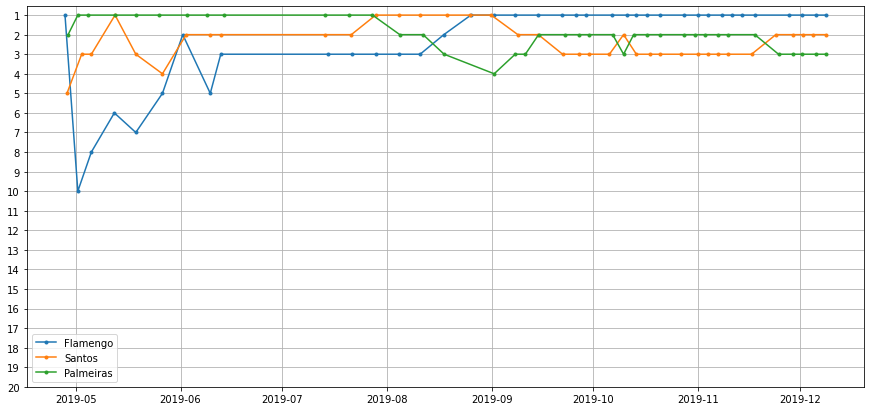

In [6]:
# Agora é só chamarmos a função passando o campeonato e os times desejados
# Neste exemplos vemos a jornada dos 3 primeiros colocados
plot_positions_over_time(brasileirao, ['Flamengo', 'Santos', 'Palmeiras'])

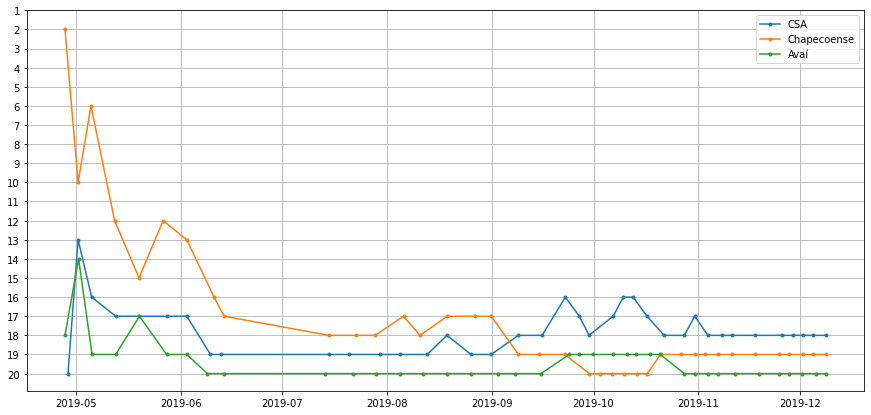

In [7]:
# E aqui a jornada dos 3 últimos colocados
plot_positions_over_time(brasileirao, ['CSA', 'Chapecoense', 'Avaí'])

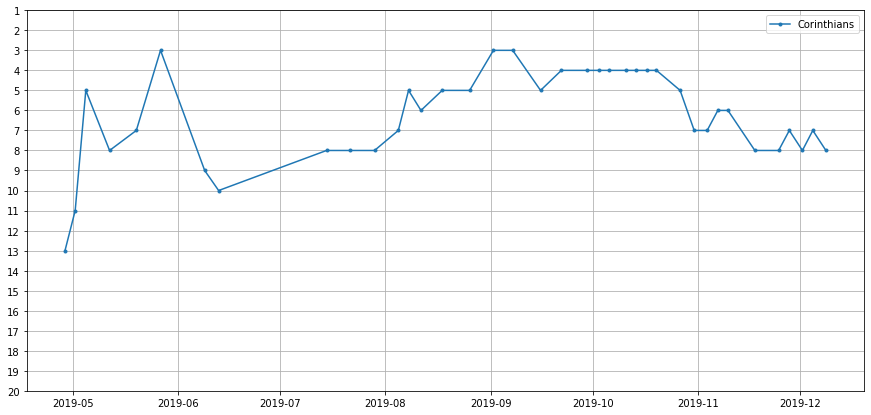

In [8]:
# E, por último, a jornada extramente irregular do meu time em busca da libertadores para no outro ano perder para o Guaraní
plot_positions_over_time(brasileirao, 'Corinthians')

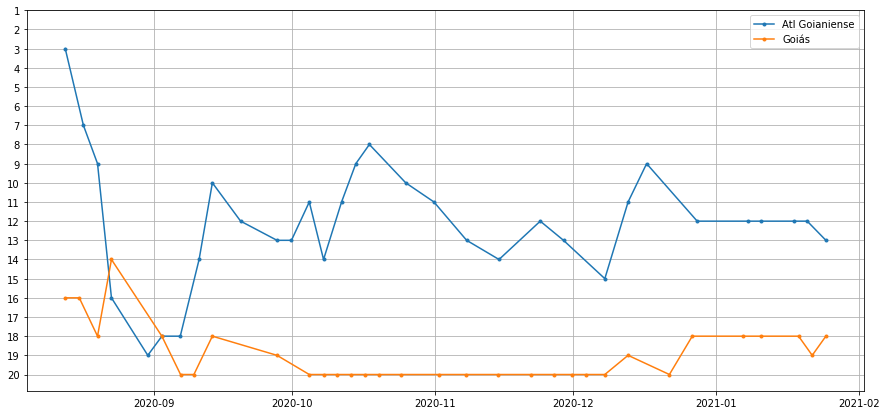

In [9]:
# Agora, com a função para gerar o gráfico definida, é simples visualizarmos o gráfico para qualquer time
# de qualquer ano do campeonato. Desde de que os jogos usados para alimentar a classe estejam no formato visto

# Aqui vemos o progresso dos dois times da minha cidade no Brasileirão de 2020
# (até agora, faltando 6 ou 7 rodadas para o fim)

df = pd.read_csv(f'data/camp_brasileiro/camp_brasileiro_2020.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')

brasileirao2020 = Championship(df['home'].unique())
brasileirao2020.add_matches(df)

plot_positions_over_time(brasileirao2020, ['Atl Goianiense', 'Goiás'])

In [ ]:
# PS: A posição de um time é atualizada sempre que ele joga, então pode acontecer de dois times ocuparem a mesma posição
# numa mesma data. Por exemplo, o time A perdeu seu jogo e foi para a posição 18, isso ficou armazenado, daí um time B
# que jogou no mesmo dia ganhou e subuiu para a posição 18 deixando o time A na posição 17.